# STC Stock Performance Analysis

## Project Overview

In this project, we delve into the stock performance of Saudi Telecom Company (STC). The analysis is structured around key questions aimed at uncovering trends and behaviors in STC's stock history. We explore various data points to understand the company's market performance over time.

## Research Questions

The project seeks to answer the following pivotal questions:

1. **Q1: What is the company's performance?**
   - We analyze the overall trend in STC's stock prices to comprehend the company's historical market performance.

2. **Q2: What is the traded volume for this company?**
   - We look at the trading volume data to assess investor interest and the stock's market liquidity.

3. **Q3: How informative are the 20-day and 50-day moving averages?**
   - We interpret these moving averages to decipher the stock's short-term and long-term price trends.

Each question targets a distinct facet of STC's stock performance, contributing to a holistic view that could serve investors and company stakeholders in understanding STC's standing in the stock market.


In [3]:
import pandas as pd
import numpy as np
import talib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go


## Data Understading|

In [4]:
df =pd.read_excel('quotes.XLS')

In [5]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Company,stc,NaN,NaN,NaN,NaN,NaN
1,Period,14/03/2021 – 11/03/2024,NaN,NaN,NaN,NaN,NaN
2,Ticker code,7010,NaN,NaN,NaN,NaN,NaN
3,Share,stc,NaN,NaN,NaN,NaN,
4,Currency,SAR,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  755 non-null    object
 1   Unnamed: 1  753 non-null    object
 2   Unnamed: 2  748 non-null    object
 3   Unnamed: 3  748 non-null    object
 4   Unnamed: 4  748 non-null    object
 5   Unnamed: 5  748 non-null    object
 6   Unnamed: 6  1 non-null      object
dtypes: object(7)
memory usage: 41.4+ KB


# Data Cleaning 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  755 non-null    object
 1   Unnamed: 1  753 non-null    object
 2   Unnamed: 2  748 non-null    object
 3   Unnamed: 3  748 non-null    object
 4   Unnamed: 4  748 non-null    object
 5   Unnamed: 5  748 non-null    object
 6   Unnamed: 6  1 non-null      object
dtypes: object(7)
memory usage: 41.4+ KB


In [8]:
df.isnull().sum()

Unnamed: 0      0
Unnamed: 1      2
Unnamed: 2      7
Unnamed: 3      7
Unnamed: 4      7
Unnamed: 5      7
Unnamed: 6    754
dtype: int64

In [9]:
temp_df = df.iloc[5:].reset_index(drop=True)

In [10]:
df_new = pd.DataFrame(temp_df.values[1:], columns=temp_df.iloc[0])


In [11]:
df_new

,Date,Open,High,Low,Close,Volume,NaN
0,2021-03-14 00:00:00,47.2,47.52,47.04,47.28,934543,NaN
1,2021-03-15 00:00:00,47.28,47.52,46.72,47.52,1149398,NaN
2,2021-03-16 00:00:00,47.28,47.76,47.2,47.6,1012633,NaN
3,2021-03-17 00:00:00,47.52,47.52,46.24,46.4,2277733,NaN
4,2021-03-18 00:00:00,46.4,46.48,45.84,45.84,3354565,NaN
...,...,...,...,...,...,...,...
744,2024-03-07 00:00:00,41.25,41.4,41.05,41.15,1880307,NaN
745,2024-03-10 00:00:00,41.15,41.35,41.1,41.25,911055,NaN
746,2024-03-11 00:00:00,41.1,41.15,40.45,40.45,3189840,NaN
747,,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_new = df_new.iloc[:-2]

In [13]:
df_new.tail()

,Date,Open,High,Low,Close,Volume,NaN
742,2024-03-05 00:00:00,41.1,41.4,40.55,40.55,2686500,NaN
743,2024-03-06 00:00:00,40.6,41.35,40.55,41.35,2487739,NaN
744,2024-03-07 00:00:00,41.25,41.4,41.05,41.15,1880307,NaN
745,2024-03-10 00:00:00,41.15,41.35,41.1,41.25,911055,NaN
746,2024-03-11 00:00:00,41.1,41.15,40.45,40.45,3189840,NaN


In [14]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    747 non-null    object
 1   Open    747 non-null    object
 2   High    747 non-null    object
 3   Low     747 non-null    object
 4   Close   747 non-null    object
 5   Volume  747 non-null    object
 6   nan     0 non-null      object
dtypes: object(7)
memory usage: 41.0+ KB


# Data Analysis And EDA

In [15]:
df_new.set_index('Date', inplace=True)

df_new.describe()

/Users/nawafalhussain/anaconda3/envs/udacity_env/lib/python3.9/site-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,Open,High,Low,Close,Volume,NaN
count,747,747.00,747,747.0,747,0
unique,320,317.00,310,320.0,747,0
top,46,46.48,40,46.4,934543,NaN
freq,10,10.00,10,13.0,1,NaN


In [16]:
df_new.head()

,Open,High,Low,Close,Volume,NaN
Date,,,,,,
2021-03-14,47.2,47.52,47.04,47.28,934543,NaN
2021-03-15,47.28,47.52,46.72,47.52,1149398,NaN
2021-03-16,47.28,47.76,47.2,47.6,1012633,NaN
2021-03-17,47.52,47.52,46.24,46.4,2277733,NaN
2021-03-18,46.4,46.48,45.84,45.84,3354565,NaN


### Q1: What is the performance for this company ? 

Our aim is to examine whether there is a discernible pattern or trend in STC's stock closing prices on a monthly basis. 
We hypothesize that certain months may exhibit consistent trends in price movements, which could be indicative of underlying market behaviors or company-specific events.


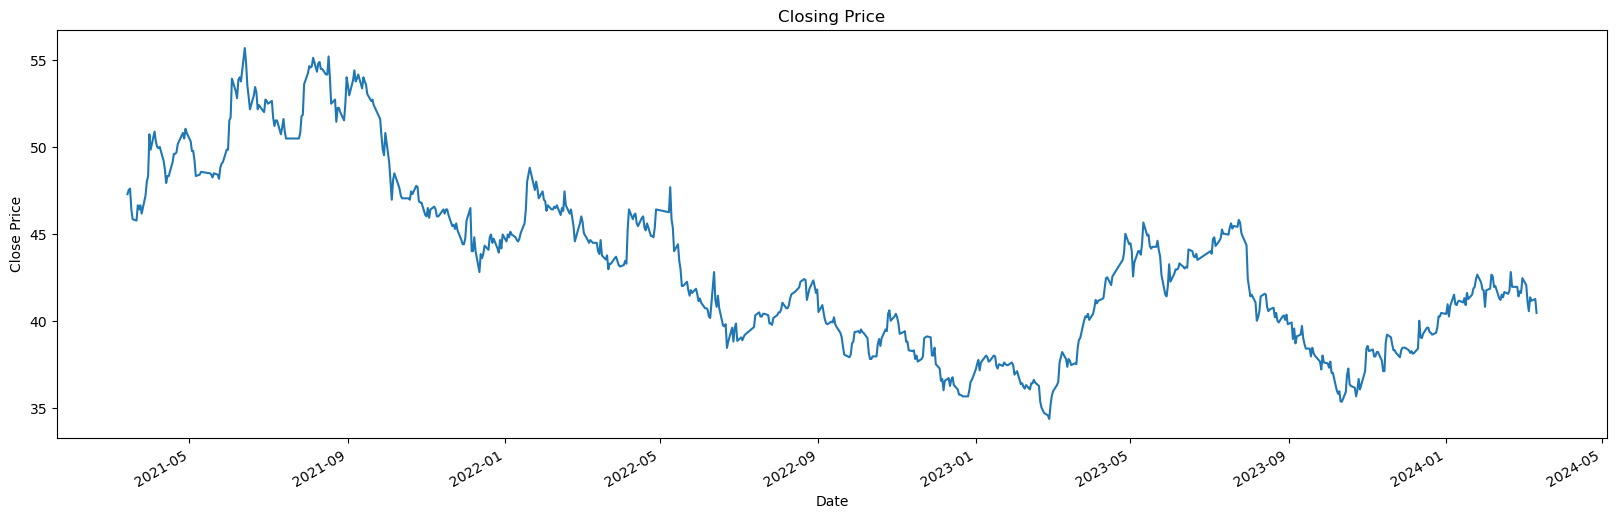

In [17]:
df_new['Close'].plot(figsize=(20, 6), title='Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.savefig('closing_price_chart.png', bbox_inches='tight')

plt.show()  

At the end of each yeat, we can see there is a bottom in the stock 

### Q2: How much volumn on this Company?

We propose that the trading volume of STC's stock serves as an indicator of investor interest and market confidence. A higher volume may suggest a strong investor response to company news or market events, while a lower volume could indicate investor uncertainty or lack of significant market drivers.


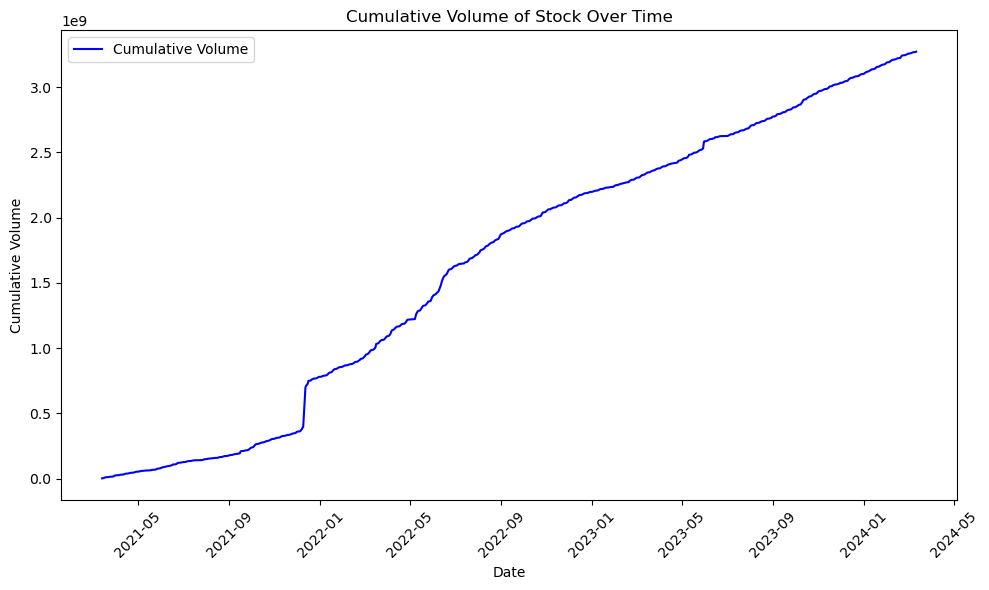

In [18]:
# Plot the cumulative sum of volume over time
plt.figure(figsize=(10, 6))
plt.plot(df_new['Volume'].cumsum(), color='b', label='Cumulative Volume')
plt.xlabel('Date')
plt.ylabel('Cumulative Volume')
plt.title('Cumulative Volume of Stock Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Volume_chart.png', bbox_inches='tight')

plt.show()



here we can see the volumn over time is increasing every year also we can see after frist of 2021 we can see roock on volumn this because 

In [19]:
df_new['Volume'].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 747 entries, 2021-03-14 to 2024-03-11
Series name: Volume
Non-Null Count  Dtype 
--------------  ----- 
747 non-null    object
dtypes: object(1)
memory usage: 11.7+ KB


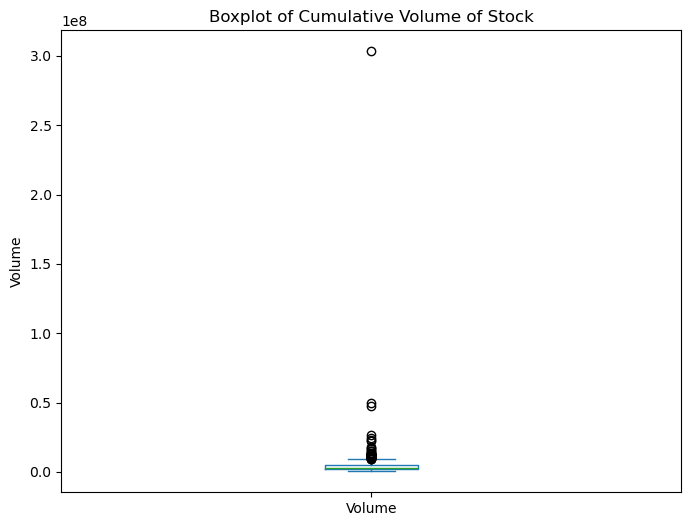

In [20]:
plt.figure(figsize=(8, 6))
df_new['Volume'].plot.box()
plt.title('Boxplot of Cumulative Volume of Stock')
plt.ylabel('Volume')
plt.show()

In [21]:
#### this date for { The secondary public offering (SPO) for STC begins today with the offering of 10.02 million shares of the company's stock to individual investors.}
max_volume = df_new['Volume'].max()

In [22]:
mean_volume = df_new['Volume'].mean()
mean_volume

4378651.50334672

In [23]:
min_volume = df_new['Volume'].min()
min_volume

400335

In [24]:
which_date = df_new['Volume'].idxmax()

In [25]:
# Print the details
print("The secondary public offering (SPO) for STC begins today with the offering of 10.02 million shares of the company's stock to individual investors.")
print("Maximum Volume:", max_volume)
print("Date with Maximum Volume:", which_date)

The secondary public offering (SPO) for STC begins today with the offering of 10.02 million shares of the company's stock to individual investors.
Maximum Volume: 303287005
Date with Maximum Volume: 2021-12-12 00:00:00


### Q3: How do the 20-day and 50-day moving averages provide insights into the stock's price trend?

Our hypothesis posits that the 20-day (MA20) and 50-day (MA50) moving averages can be used as indicators to signal potential changes in the stock's price trend. 
The crossing of these two averages may suggest a shift in momentum and possibly predict future price movements.


/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_81916/133344342.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA20'] = df['Close'].rolling(window=20).mean()
/var/folders/q9/r2j6s5gj6vqbgwbptm3ztjsc0000gn/T/ipykernel_81916/133344342.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA50'] = df['Close'].rolling(window=50).mean()


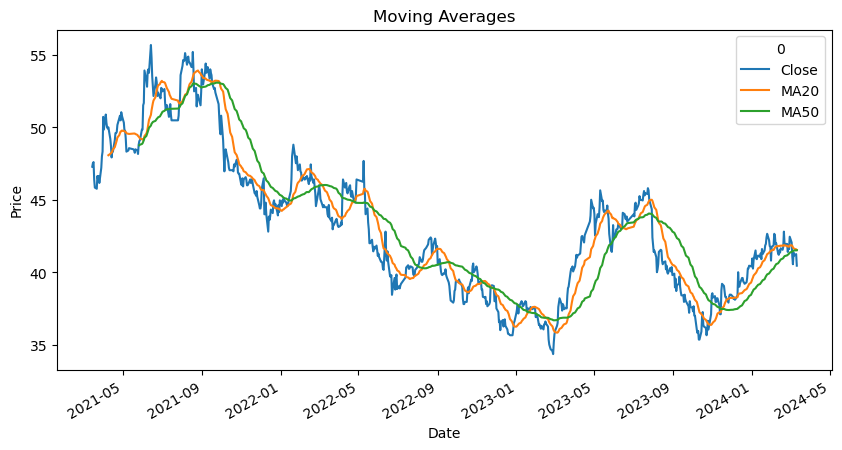

In [26]:
import matplotlib.pyplot as plt

def plot_moving_averages(df):
    """
    This function calculates the 20-day and 50-day moving averages of the 'Close' column 
    in the provided dataframe and plots these along with the closing prices.

    Parameters:
    - df: A pandas DataFrame with a 'Close' column representing closing prices of a stock.

    The function will save the resulting plot as 'Moving_Average.png' in the current directory.
    """

    # Calculate the 20-day moving average and store it in a new column 'MA20'
    df['MA20'] = df['Close'].rolling(window=20).mean()

    # Calculate the 50-day moving average and store it in a new column 'MA50'
    df['MA50'] = df['Close'].rolling(window=50).mean()

    # Plot the closing prices along with the 20-day and 50-day moving averages
    ax = df[['Close', 'MA20', 'MA50']].plot(figsize=(10, 5), title="Moving Averages")
    
    # Labeling the axes
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    
    # Save the plot as a PNG file
    plt.savefig('Moving_Average.png', bbox_inches='tight')

# Assuming df_new is your DataFrame with the 'Close' price data
plot_moving_averages(df_new)


#### Observations
- **Bullish Crossover**: When the MA20 crosses above the MA50, it is typically considered a bullish signal, indicating that the stock's price might be heading upwards in the short term.
- **Bearish Crossover**: Conversely, if the MA20 crosses below the MA50, it might be seen as a bearish signal, suggesting a possible downward trend.
- **Support and Resistance**: These moving averages often act as support and resistance levels for the stock's price. If the price falls towards a moving average, it might find support and bounce back up; if it rises towards a moving average, the average could act as a resistance level that's hard to break through.


## resourcee for this data is from 
https://www.stc.com.sa/content/stcgroupwebsite/sa/en/investors/share-information/shares/share-series-monitor.html